<a href="https://colab.research.google.com/github/MauroTalamantes/RegresionLinealFumadores/blob/main/RegresionLinealGastosMedicosFumadores.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Intervalo 1121.87 - 3210.16: 208
Intervalo 3210.16 - 5298.44: 174
Intervalo 5298.44 - 7386.73: 154
Intervalo 7386.73 - 9475.01: 140
Intervalo 9475.01 - 11563.30: 139
Intervalo 11563.30 - 13651.58: 119
Intervalo 13651.58 - 15739.87: 55
Intervalo 15739.87 - 17828.15: 32
Intervalo 17828.15 - 19916.44: 42
Intervalo 19916.44 - 22004.73: 36
Intervalo 22004.73 - 24093.01: 23
Intervalo 24093.01 - 26181.30: 27
Intervalo 26181.30 - 28269.58: 16
Intervalo 28269.58 - 30357.87: 16
Intervalo 30357.87 - 32446.15: 3
Intervalo 32446.15 - 34534.44: 15
Intervalo 34534.44 - 36622.72: 22
Intervalo 36622.72 - 38711.01: 22
Intervalo 38711.01 - 40799.29: 22
Intervalo 40799.29 - 42887.58: 19
Intervalo 42887.58 - 44975.86: 16
Intervalo 44975.86 - 47064.15: 14
Intervalo 47064.15 - 49152.43: 16
Intervalo 49152.43 - 51240.72: 2
Intervalo 51240.72 - 53329.00: 1
Intervalo 53329.00 - 55417.29: 1
Intervalo 55417.29 - 57505.57: 0
Intervalo 57505.57 - 59593.86: 1
Intervalo 59593.86 - 61682.14: 1
Intervalo 61682.14 - 637

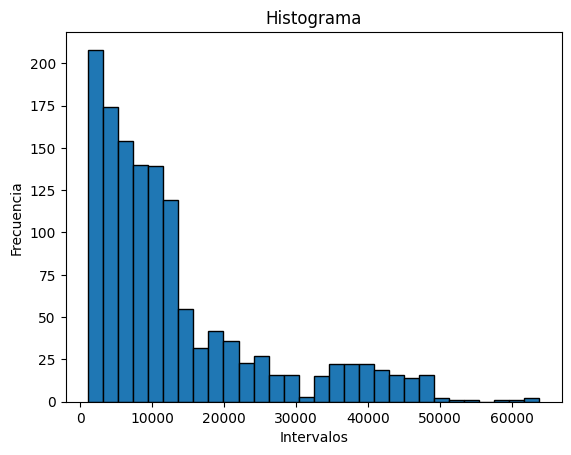

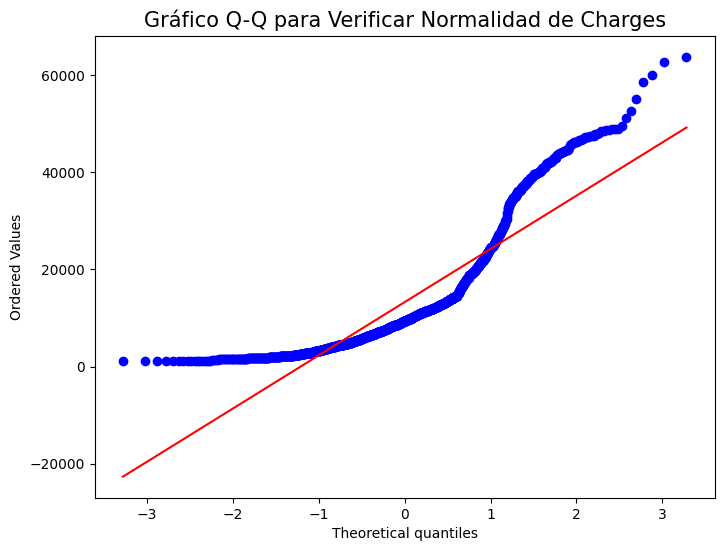

count     1338.000000
mean     13270.422265
std      12110.011237
min       1121.873900
25%       4740.287150
50%       9382.033000
75%      16639.912515
max      63770.428010
Name: charges, dtype: float64
Min: 1121.8739
Q1: 4740.28715
Mediana: 9382.033
Q3: 16639.912515
Max: 63770.42801
Media: 13270.422265141257
Varianza: 146542766.49354774
Desviación estándar: 12105.484975561605
Error cuadrático medio (MSE): 33635210.431178406
R² (Coeficiente de determinación): 0.7833463107364539
charges = -12760.46 + 257.06 * age + 335.78 * bmi + 425.09 * children + 23647.82 * smoker + -18.79 * sex + 271.28 * region


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Leer el archivo CSV (ajusta la ruta si es necesario)
data = pd.read_csv('/content/insurance.csv')

# Codificar variables categóricas
data['sex'] = data['sex'].map({'female': 0, 'male': 1})
data['smoker'] = data['smoker'].map({'no': 0, 'yes': 1})
data['region'] = pd.factorize(data['region'])[0]

# Selección de variables (X) e independiente (y)
X = data[['age', 'bmi', 'children', 'smoker', 'sex', 'region']]
y = data['charges']


# Calcular estadísticas descriptivas
var_dependiente = data['charges'].values
n = len(var_dependiente)

# Media
media = np.sum(var_dependiente) / len(var_dependiente)

# Mediana
var_ordenada = np.sort(var_dependiente)
if n % 2 == 0:
    mediana = (var_ordenada[(n//2)-1] + var_ordenada[(n//2)]) / 2
else:
    mediana = var_ordenada[n//2]

# Varianza
varianza = sum((x - media) ** 2 for x in var_dependiente) / n

# Desviación estándar
desviacion = np.sqrt(varianza)

# Obtener el histograma
# Calculamos cuantos bins hacer
rango_datos = np.max(var_dependiente) - np.min(var_dependiente)
Q1 = np.percentile(var_dependiente, 25)
Q3 = np.percentile(var_dependiente, 75)
IQR = Q3 - Q1
bins = int(np.ceil(rango_datos / (2 * IQR / (n ** (1/3)))))

# Definimos los límites
intervalos = np.linspace(np.min(var_dependiente), np.max(var_dependiente), bins + 1)

# Obtenemos las frecuencias
frecuencias = []
for i in range(len(intervalos) - 1):
    frecuencia = np.sum((var_dependiente >= intervalos[i]) & (var_dependiente < intervalos[i + 1]))
    frecuencias.append(frecuencia)
# Para el último contamos los que son exactos al máximo
frecuencias[-1] += np.sum(var_dependiente == np.max(var_dependiente))

for i in range(len(frecuencias)):
    print(f'Intervalo {intervalos[i]:.2f} - {intervalos[i + 1]:.2f}: {frecuencias[i]}')

# Graficamos el histograma
plt.bar(intervalos[:-1], frecuencias, width=np.diff(intervalos), align='edge', edgecolor='black')
plt.xlabel('Intervalos')
plt.ylabel('Frecuencia')
plt.title('Histograma')
plt.show()

# Crear un gráfico Q-Q para verificar la normalidad
plt.figure(figsize=(8, 6))
stats.probplot(data['charges'], dist="norm", plot=plt)
plt.title('Gráfico Q-Q para Verificar Normalidad de Charges', fontsize=15)
plt.show()

# Estadísticas descriptivas
print(data['charges'].describe())
print(f"Min: {np.min(var_dependiente)}")
print(f"Q1: {Q1}")
print(f"Mediana: {mediana}")
print(f"Q3: {Q3}")
print(f"Max: {np.max(var_dependiente)}")
print(f"Media: {media}")
print(f"Varianza: {varianza}")
print(f"Desviación estándar: {desviacion}")


# División en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Hacer predicciones
y_pred = model.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Obtener coeficientes y el intercepto
intercept = model.intercept_
coefficients = model.coef_
print(f"Error cuadrático medio (MSE): {mse}")
print(f"R² (Coeficiente de determinación): {r2}")
# Imprimir la ecuación de la recta
equation = f"charges = {intercept:.2f} + {coefficients[0]:.2f} * age + {coefficients[1]:.2f} * bmi + {coefficients[2]:.2f} * children + {coefficients[3]:.2f} * smoker + {coefficients[4]:.2f} * sex + {coefficients[5]:.2f} * region"
print(equation)


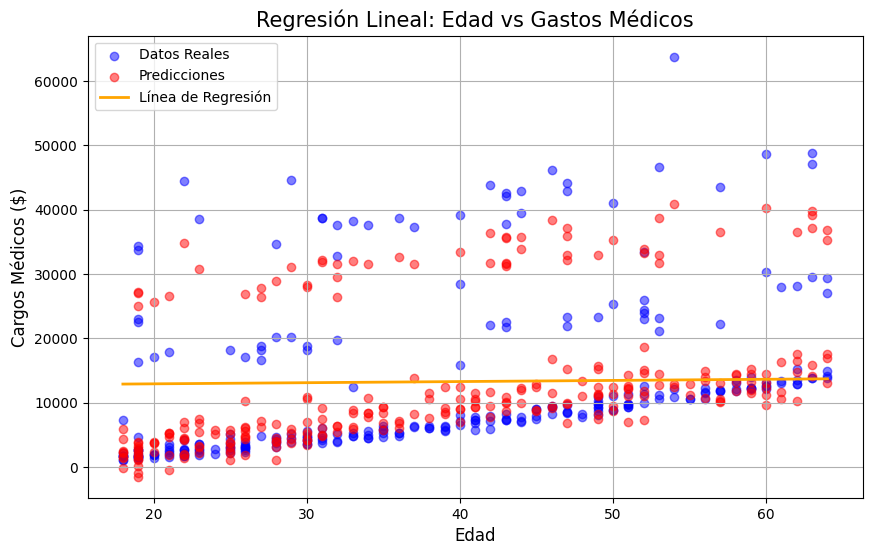

In [ ]:
# Gráfico de dispersión de Age vs Charges
plt.figure(figsize=(10, 6))
plt.scatter(X_test['age'], y_test, color='blue', label='Datos Reales', alpha=0.5)
plt.scatter(X_test['age'], y_pred, color='red', label='Predicciones', alpha=0.5)

# Graficar la línea de regresión
# Para graficar la línea de regresión, necesitamos los valores de x y los correspondientes valores de y.
# Aquí tomamos un rango de edad para la línea de regresión.
age_range = np.linspace(X['age'].min(), X['age'].max(), 100)
# Crear un DataFrame para las predicciones
pred_df = pd.DataFrame({'age': age_range})
# Realizar la predicción
pred_df['bmi'] = np.mean(data['bmi'])  # Usar el promedio de BMI
pred_df['children'] = np.mean(data['children'])  # Usar el promedio de Children
pred_df['smoker'] = 0  # Supongamos no fumador
pred_df['sex'] = 0  # Supongamos femenino
pred_df['region'] = 0  # Supongamos región codificada como 0
predictions = model.predict(pred_df)

# Graficar la línea de regresión
plt.plot(age_range, predictions, color='orange', label='Línea de Regresión', linewidth=2)

# Configurar el gráfico
plt.title('Regresión Lineal: Edad vs Gastos Médicos', fontsize=15)
plt.xlabel('Edad', fontsize=12)
plt.ylabel('Cargos Médicos ($)', fontsize=12)
plt.legend()
plt.grid()
plt.show()

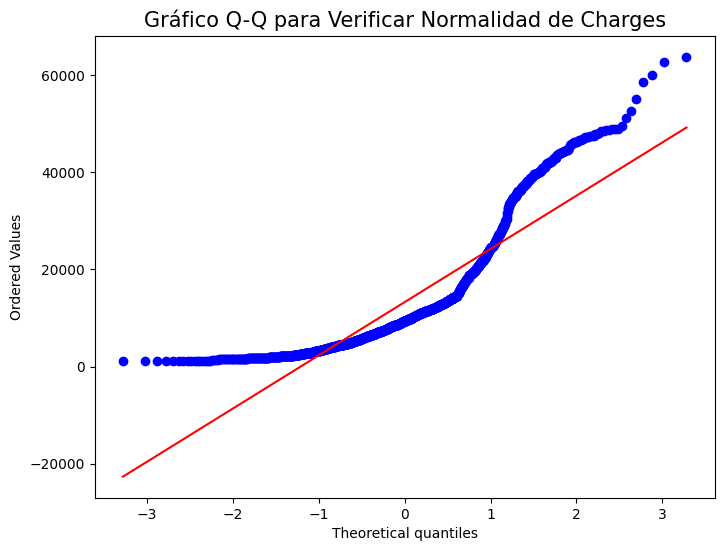

In [ ]:
# Gráfico Q-Q para verificar la normalidad
plt.figure(figsize=(8, 6))
stats.probplot(data['charges'], dist="norm", plot=plt)
plt.title('Gráfico Q-Q para Verificar Normalidad de Charges', fontsize=15)

# Aquí podrías agregar una línea que represente la normalidad
# Aunque en un Q-Q plot, la línea es más de referencia y no de regresión.
# La línea de referencia en un Q-Q plot normalmente está definida.
plt.show()


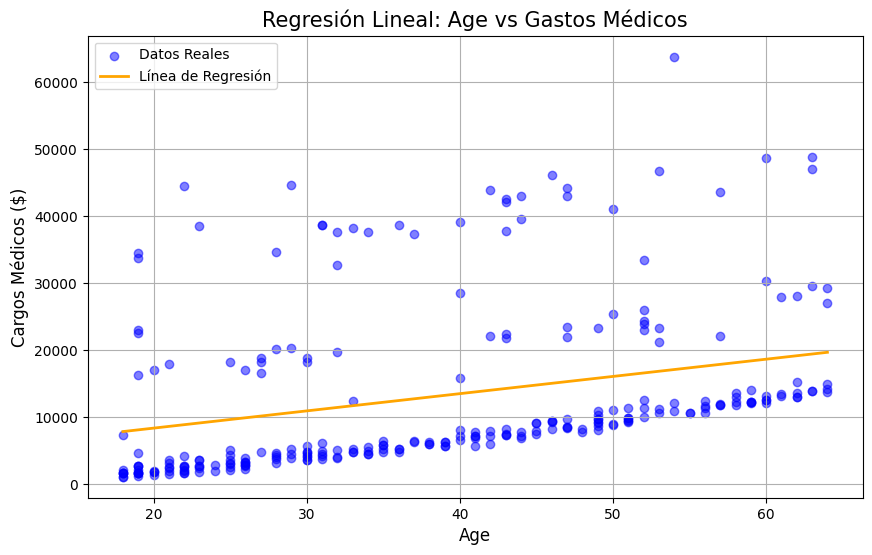

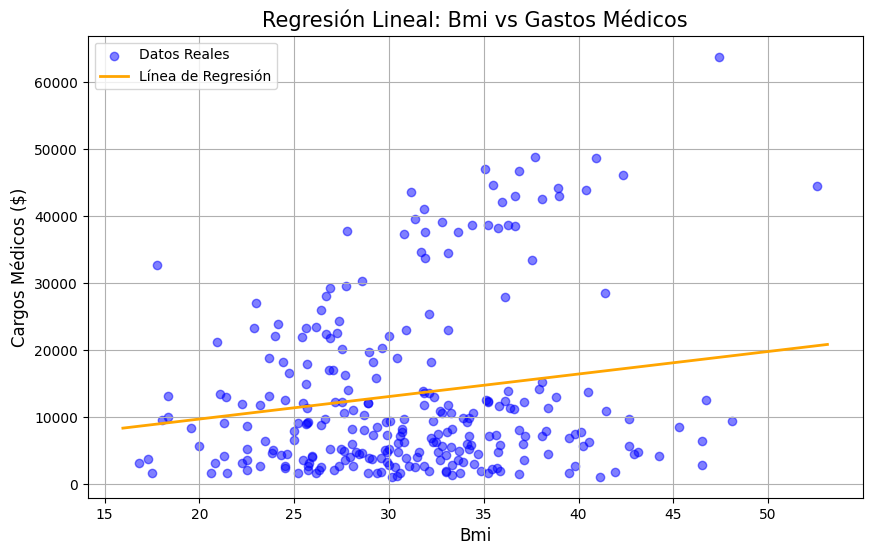

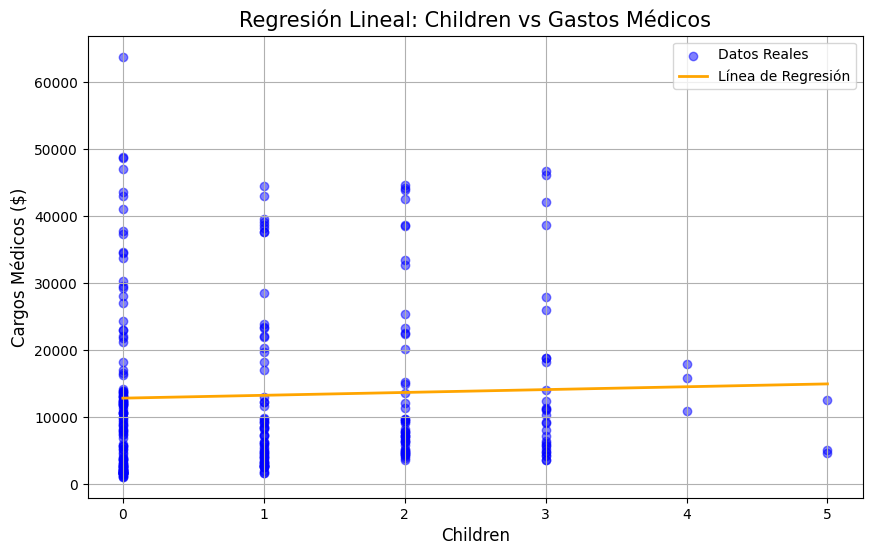

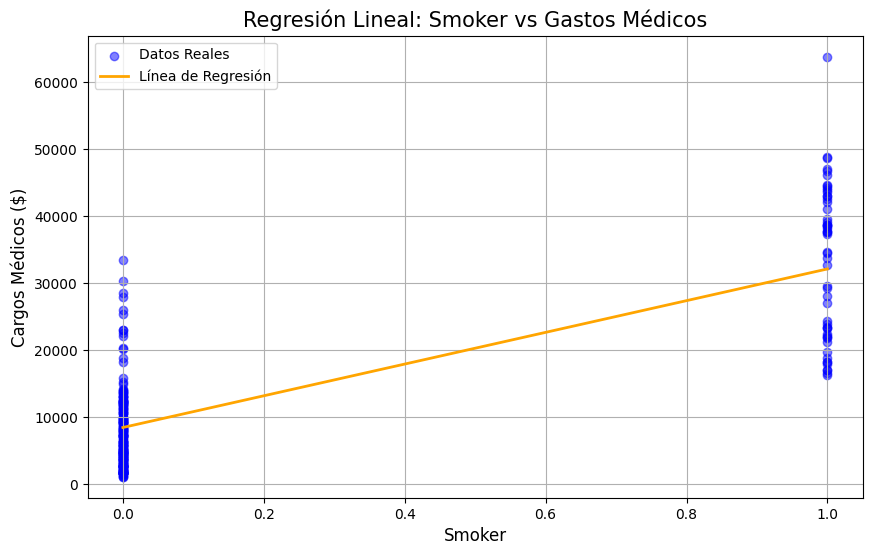

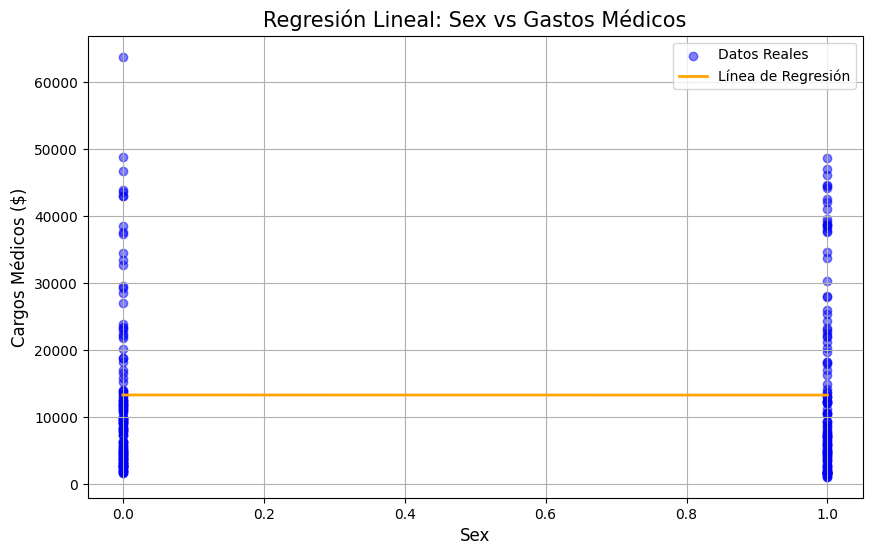

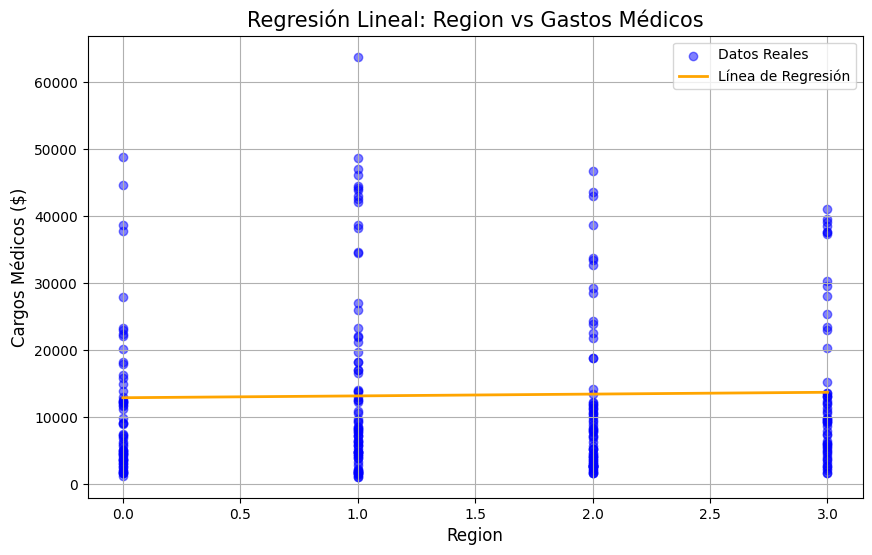

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Leer el archivo CSV (ajusta la ruta si es necesario)
data = pd.read_csv('/content/insurance.csv')

# Codificar variables categóricas
data['sex'] = data['sex'].map({'female': 0, 'male': 1})
data['smoker'] = data['smoker'].map({'no': 0, 'yes': 1})
data['region'] = pd.factorize(data['region'])[0]

# Selección de variables (X) e independiente (y)
X = data[['age', 'bmi', 'children', 'smoker', 'sex', 'region']]
y = data['charges']

# División en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ajustar el modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

# Variables a graficar
variables = ['age', 'bmi', 'children', 'smoker', 'sex', 'region']

# Crear gráficos para cada variable independiente
for var in variables:
    plt.figure(figsize=(10, 6))

    # Gráfico de dispersión de la variable vs Cargos Médicos
    plt.scatter(X_test[var], y_test, color='blue', label='Datos Reales', alpha=0.5)

    # Preparar los datos para la línea de regresión
    # Rango de la variable actual
    var_range = np.linspace(X[var].min(), X[var].max(), 100)

    # Crear un DataFrame para las predicciones
    pred_df = pd.DataFrame(columns=X.columns)  # Aseguramos que las columnas coincidan
    pred_df[var] = var_range  # Asignar el rango a la variable actual

    # Usar los promedios de las demás variables
    for other_var in variables:
        if other_var != var:
            pred_df[other_var] = np.mean(data[other_var])

    # Realizar la predicción
    predictions = model.predict(pred_df)

    # Graficar la línea de regresión
    plt.plot(var_range, predictions, color='orange', label='Línea de Regresión', linewidth=2)

    # Configurar el gráfico
    plt.title(f'Regresión Lineal: {var.capitalize()} vs Gastos Médicos', fontsize=15)
    plt.xlabel(var.capitalize(), fontsize=12)
    plt.ylabel('Cargos Médicos ($)', fontsize=12)
    plt.legend()
    plt.grid()
    plt.show()
